In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

from func import des_df

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
df_original = pd.read_csv("Data/soccer_data.csv")

In [4]:
df =df_original.copy()
df.head()

,match_id,date_planned_start,match_start,player_1,player_2,player_1_fh_goals,player_2_fh_goals,player_1_sh_goals,player_2_sh_goals,player_1_total_goals,player_2_total_goals,shift_n,match_count_within_shift,match_count_within_shift_player_pair
0,118925,1667287320,1667287308,5,20,1,1,0,2,1,3,134.0,3,1
1,118928,1667289840,1667289843,5,20,0,0,1,0,1,0,134.0,6,2
2,118931,1667292360,1667292351,5,20,1,1,0,2,1,3,134.0,9,3
3,118934,1667294880,1667294890,5,20,2,0,0,1,2,1,134.0,12,4
4,118937,1667297400,1667297389,5,20,1,1,1,0,2,1,134.0,15,5


In [5]:
df =df.sort_values('match_start', ascending=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15220 entries, 132 to 15219
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   match_id                              15220 non-null  int64  
 1   date_planned_start                    15220 non-null  int64  
 2   match_start                           15220 non-null  int64  
 3   player_1                              15220 non-null  int64  
 4   player_2                              15220 non-null  int64  
 5   player_1_fh_goals                     15220 non-null  int64  
 6   player_2_fh_goals                     15220 non-null  int64  
 7   player_1_sh_goals                     15220 non-null  int64  
 8   player_2_sh_goals                     15220 non-null  int64  
 9   player_1_total_goals                  15220 non-null  int64  
 10  player_2_total_goals                  15220 non-null  int64  
 11  shift_n      

In [7]:
df["Total_goals"] = df["player_1_total_goals"] + df["player_2_total_goals"]

In [8]:
df.isna().any()

match_id                                False
date_planned_start                      False
match_start                             False
player_1                                False
player_2                                False
player_1_fh_goals                       False
player_2_fh_goals                       False
player_1_sh_goals                       False
player_2_sh_goals                       False
player_1_total_goals                    False
player_2_total_goals                    False
shift_n                                 False
match_count_within_shift                False
match_count_within_shift_player_pair    False
Total_goals                             False
dtype: bool

In [9]:
df.isnull().any()

match_id                                False
date_planned_start                      False
match_start                             False
player_1                                False
player_2                                False
player_1_fh_goals                       False
player_2_fh_goals                       False
player_1_sh_goals                       False
player_2_sh_goals                       False
player_1_total_goals                    False
player_2_total_goals                    False
shift_n                                 False
match_count_within_shift                False
match_count_within_shift_player_pair    False
Total_goals                             False
dtype: bool

In [10]:
len(df['shift_n'].unique())

237

## basic eda of features

*********************************


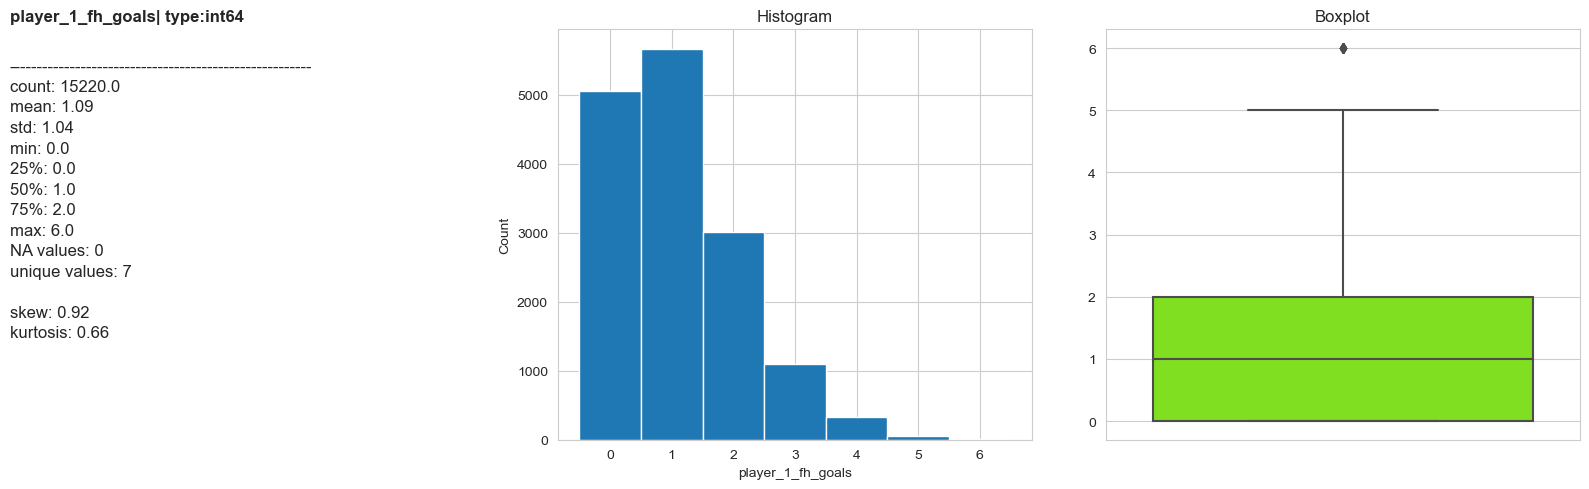

*********************************


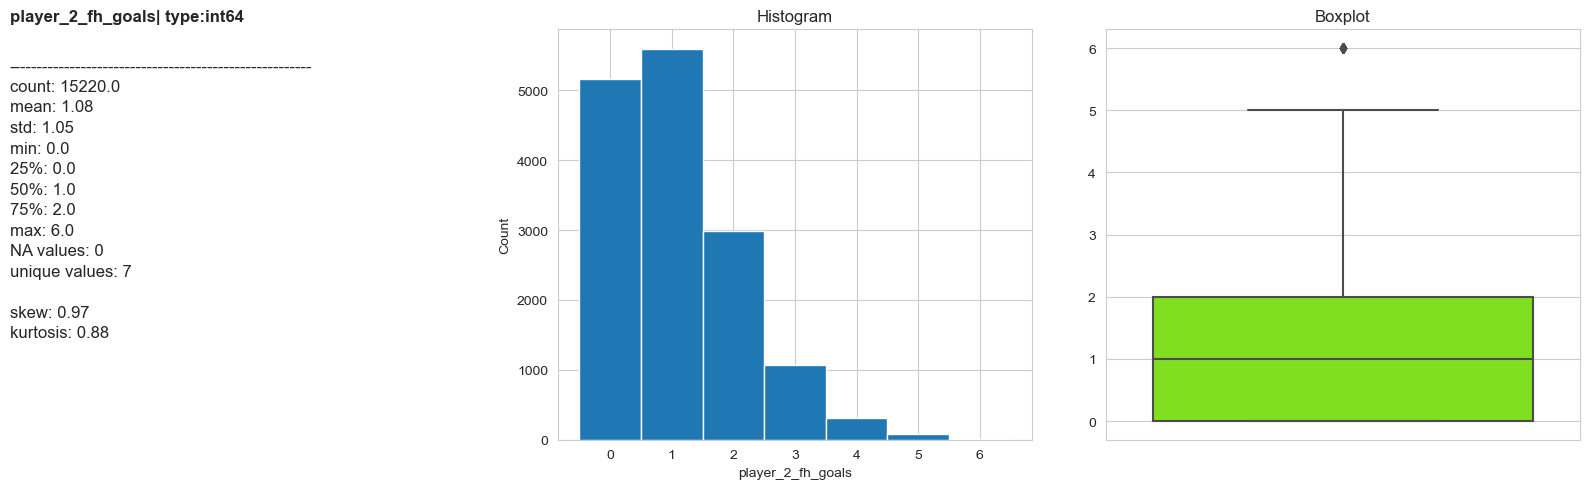

*********************************


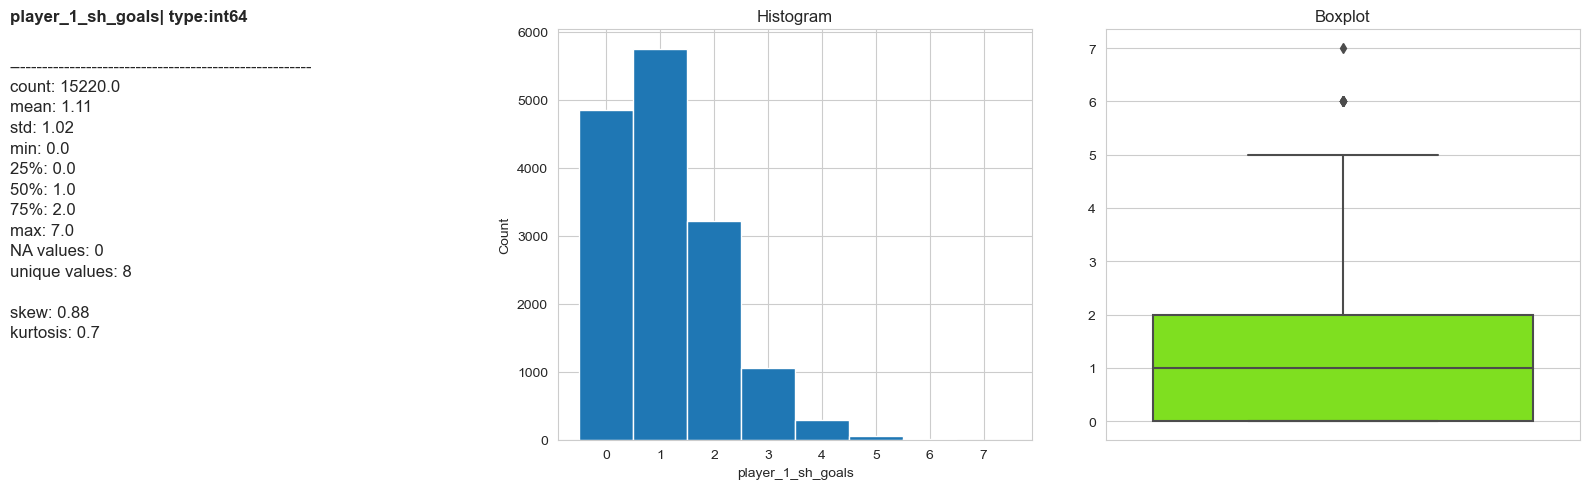

*********************************


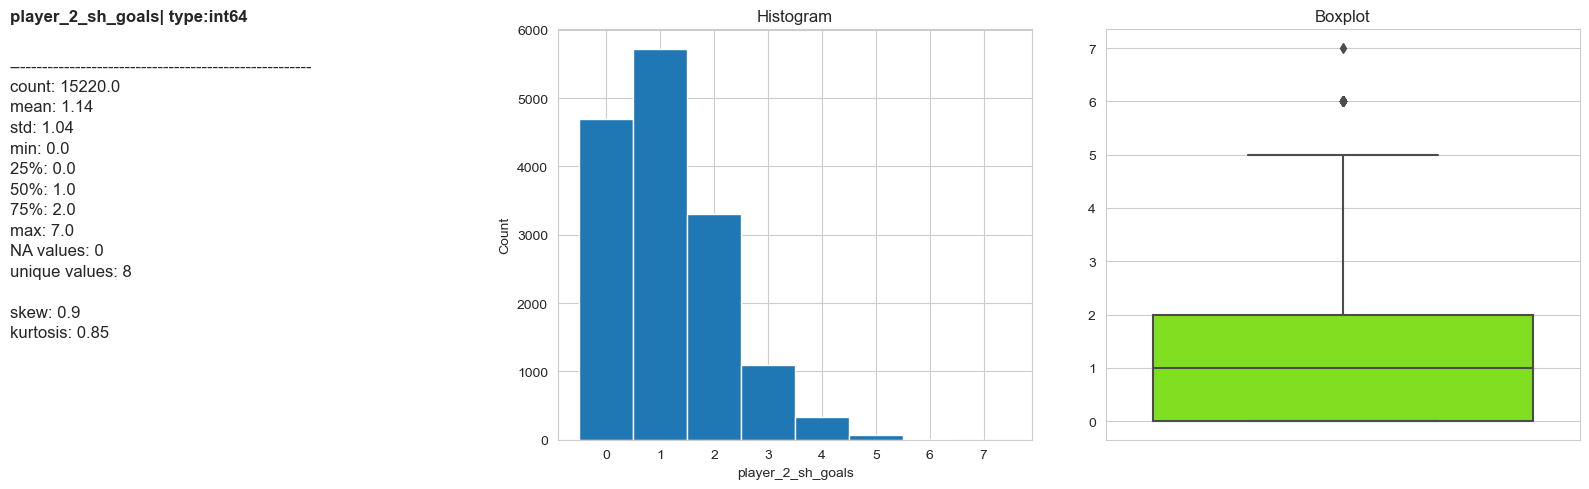

*********************************


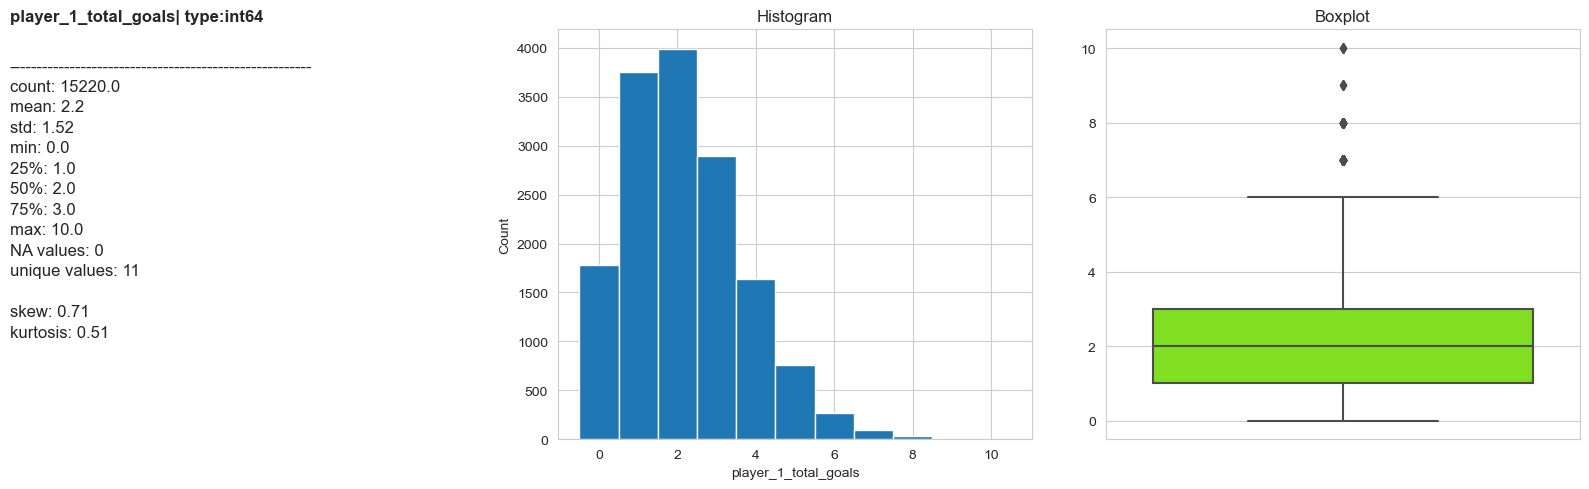

*********************************


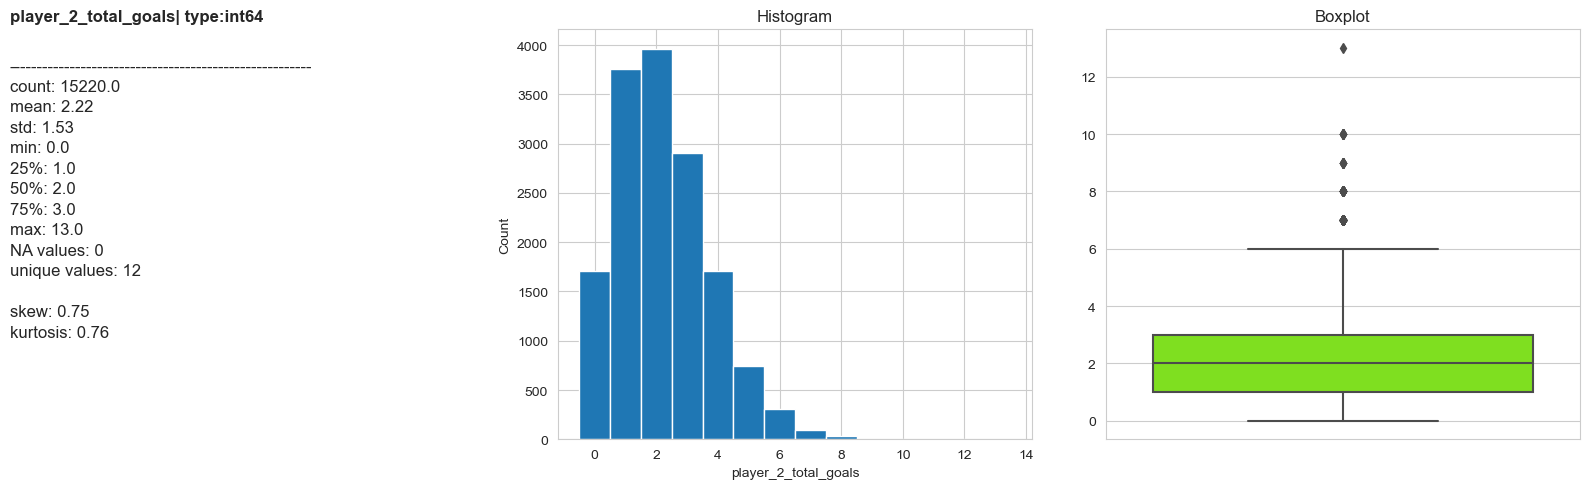

*********************************


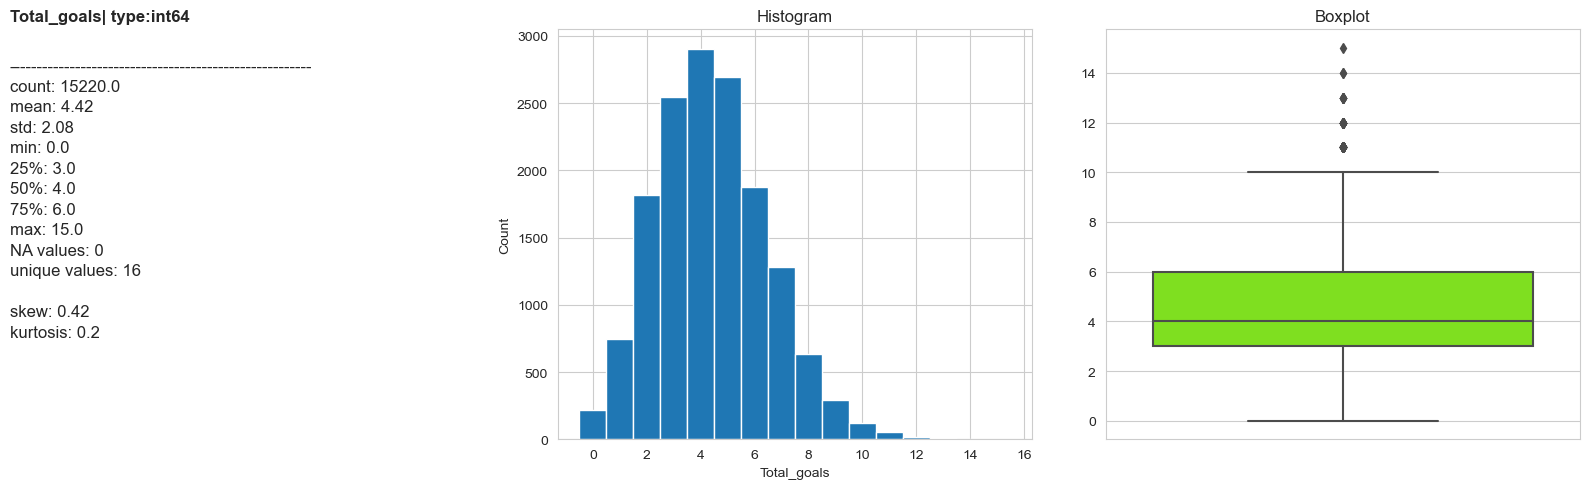

In [11]:
des_df(df.loc[:,['player_1_fh_goals','player_2_fh_goals', 'player_1_sh_goals', 'player_2_sh_goals', 'player_1_total_goals', 'player_2_total_goals', 'Total_goals']])

In [12]:
# přidání sloupe result (1,0,2) a bilance (1,0,-1)
df['result'] = df.apply(lambda x: 1 if x['player_1_total_goals'] > x['player_2_total_goals'] else (0 if x['player_1_total_goals'] == x['player_2_total_goals'] else 2), axis=1)
df['p1_bilance'] = df.apply(lambda x: 1 if x['player_1_total_goals'] > x['player_2_total_goals'] else (0 if x['player_1_total_goals'] == x['player_2_total_goals'] else -1), axis=1)
df['p2_bilance'] = df.apply(lambda x: 1 if x['player_2_total_goals'] > x['player_1_total_goals'] else (0 if x['player_1_total_goals'] == x['player_2_total_goals'] else -1), axis=1)

In [13]:
# vytvoření df s duplicitními řádky ale prohození player1 a player2 (pomocný df pro lepší manipulaci s daty)
df_flipped = df.rename(columns={'player_1': 'player_2', 'player_2': 'player_1', 
                                'player_1_fh_goals': 'player_2_fh_goals', 'player_2_fh_goals': 'player_1_fh_goals', 
                                'player_1_sh_goals': 'player_2_sh_goals', 'player_2_sh_goals': 'player_1_sh_goals', 
                                'player_1_total_goals': 'player_2_total_goals', 'player_2_total_goals': 'player_1_total_goals',
                               'p1_bilance': 'p2_bilance',  'p2_bilance': 'p1_bilance'})
df_flipped = pd.concat([df, df_flipped])
df_flipped = df_flipped.sort_values('match_start', ascending=True)
df_flipped.head()

,match_id,date_planned_start,match_start,player_1,player_2,player_1_fh_goals,player_2_fh_goals,player_1_sh_goals,player_2_sh_goals,player_1_total_goals,player_2_total_goals,shift_n,match_count_within_shift,match_count_within_shift_player_pair,Total_goals,result,p1_bilance,p2_bilance
132,118810,1667261280,1667261294,0,7,1,1,1,1,2,2,748.0,1,1,4,0,0,0
132,118810,1667261280,1667261294,7,0,1,1,1,1,2,2,748.0,1,1,4,0,0,0
123,118811,1667262120,1667262135,0,2,1,2,0,2,1,4,748.0,2,1,5,2,-1,1
123,118811,1667262120,1667262135,2,0,2,1,2,0,4,1,748.0,2,1,5,2,1,-1
141,118812,1667264640,1667264639,2,7,1,1,2,0,3,1,748.0,3,1,4,1,1,-1


In [14]:
df_flipped['result'] = df_flipped.apply(lambda x: 1 if x['player_1_total_goals'] > x['player_2_total_goals'] else (0 if x['player_1_total_goals'] == x['player_2_total_goals'] else 2), axis=1)

In [15]:
# přidání sloupců bilance pro hráče a h2h během směny
df['bilance_p1_shift'] = df.apply(lambda x: df_flipped[(df_flipped['player_1']==x['player_1']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']<x['match_start'])]['p1_bilance'].sum(),axis=1)
df['bilance_p2_shift'] = df.apply(lambda x: df_flipped[(df_flipped['player_2']==x['player_2']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']<x['match_start'])]['p2_bilance'].sum(),axis=1)
df['bilance_h2h_shift'] = df.apply(lambda x: df_flipped[(df_flipped['player_1']==x['player_1']) & (df_flipped['player_2']==x['player_2']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']<x['match_start'])]['p1_bilance'].sum(),axis=1)
df.head(20)

,match_id,date_planned_start,match_start,player_1,player_2,player_1_fh_goals,player_2_fh_goals,player_1_sh_goals,player_2_sh_goals,player_1_total_goals,...,shift_n,match_count_within_shift,match_count_within_shift_player_pair,Total_goals,result,p1_bilance,p2_bilance,bilance_p1_shift,bilance_p2_shift,bilance_h2h_shift
132,118810,1667261280,1667261294,0,7,1,1,1,1,2,...,748.0,1,1,4,0,0,0,0,0,0
123,118811,1667262120,1667262135,0,2,1,2,0,2,1,...,748.0,2,1,5,2,-1,1,0,0,0
141,118812,1667264640,1667264639,2,7,1,1,2,0,3,...,748.0,3,1,4,1,1,-1,1,0,0
133,118813,1667265480,1667265489,0,7,1,2,1,2,2,...,748.0,4,2,6,2,-1,1,-1,-1,0
124,118814,1667266320,1667266330,0,2,2,2,0,0,2,...,748.0,5,2,4,0,0,0,-2,2,-1
142,118815,1667267160,1667267158,2,7,1,0,1,1,2,...,748.0,6,2,3,1,1,-1,2,0,1
134,118816,1667268000,1667268000,0,7,0,1,2,1,2,...,748.0,7,3,4,0,0,0,-2,-1,-1
125,118817,1667268840,1667268839,0,2,0,1,1,0,1,...,748.0,8,3,2,0,0,0,-2,3,-1
143,118818,1667269680,1667269679,2,7,2,0,1,1,3,...,748.0,9,3,4,1,1,-1,3,-1,2
135,118819,1667270520,1667270525,0,7,2,0,1,1,3,...,748.0,10,4,4,1,1,-1,-2,-2,-1


In [16]:
# průměr gĺů ve směně
df['total_goals_shift_avg'] = df.groupby(['shift_n'])['Total_goals'].apply(lambda x: x.expanding().mean().shift())
# průměrvstřelených/obdržených gólů hráčů ve směně, před směnou a h2h
df['p1_avg_scored_Bshift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['shift_n']<x['shift_n']),'player_1_total_goals'].mean(),axis=1)
df['p2_avg_scored_Bshift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['shift_n']<x['shift_n']),'player_1_total_goals'].mean(),axis=1)
df['p1_avg_scored_shift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start'] < x['match_start']),'player_1_total_goals'].mean(),axis=1)
df['p2_avg_scored_shift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start'] < x['match_start']),'player_1_total_goals'].mean(),axis=1)
df['p1_avg_concat_Bshift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['shift_n']<x['shift_n']),'player_2_total_goals'].mean(),axis=1)
df['p2_avg_concat_Bshift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['shift_n']<x['shift_n']),'player_2_total_goals'].mean(),axis=1)
df['p1_avg_concat_shift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']< x['match_start']),'player_2_total_goals'].mean(),axis=1)
df['p2_avg_concat_shift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']< x['match_start']),'player_2_total_goals'].mean(),axis=1)
df['p1_avg_scored_Bshift_h2h'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['player_2']==x['player_2']) & (df_flipped['shift_n']<x['shift_n']),'player_1_total_goals'].mean(),axis=1)
df['p2_avg_scored_Bshift_h2h'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['player_2']==x['player_1'])  & (df_flipped['shift_n']<x['shift_n']),'player_1_total_goals'].mean(),axis=1)
df['p1_avg_scored_shift_h2h'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['player_2']==x['player_2']) & (df_flipped['shift_n']==x['shift_n'])& (df_flipped['match_start']< x['match_start']),'player_1_total_goals'].mean(),axis=1)
df['p2_avg_scored_shift_h2h'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['player_2']==x['player_1'])  & (df_flipped['shift_n']==x['shift_n'])& (df_flipped['match_start']< x['match_start']),'player_1_total_goals'].mean(),axis=1)

In [17]:
# no more used - no impact to results of model
# df['p1_mode_scored_Bshift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['shift_n']<x['shift_n']),'player_1_total_goals'].mode().mean(),axis=1)
# df['p2_mode_scored_Bshift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['shift_n']<x['shift_n']),'player_1_total_goals'].mode().mean(),axis=1)
# df['p1_mode_scored_shift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']< x['match_start']),'player_1_total_goals'].mode().mean(),axis=1)
# df['p2_mode_scored_shift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']< x['match_start']),'player_1_total_goals'].mode().mean(),axis=1)
# df['p1_mode_concat_Bshift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['shift_n']<x['shift_n']),'player_2_total_goals'].mode().mean(),axis=1)
# df['p2_mode_concat_Bshift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['shift_n']<x['shift_n']),'player_2_total_goals'].mode().mean(),axis=1)
# df['p1_mode_concat_shift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']< x['match_start']),'player_2_total_goals'].mode().mean(),axis=1)
# df['p2_mode_concat_shift'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']< x['match_start']),'player_2_total_goals'].mode().mean(),axis=1)
# df['p1_mode_scored_Bshift_h2h'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['player_2']==x['player_2']) & (df_flipped['shift_n']<x['shift_n']),'player_1_total_goals'].mode().mean(),axis=1)
# df['p2_mode_scored_Bshift_h2h'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['player_2']==x['player_1'])  & (df_flipped['shift_n']<x['shift_n']),'player_1_total_goals'].mode().mean(),axis=1)
# df['p1_mode_scored_shift_h2h'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_1']) & (df_flipped['player_2']==x['player_2']) & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']< x['match_start']),'player_1_total_goals'].mode().mean(),axis=1)
# df['p2_mode_scored_shift_h2h'] = df.apply(lambda x: df_flipped.loc[(df_flipped['player_1']==x['player_2']) & (df_flipped['player_2']==x['player_1'])  & (df_flipped['shift_n']==x['shift_n']) & (df_flipped['match_start']< x['match_start']),'player_1_total_goals'].mode().mean(),axis=1)

#   Create aggregate data frame by shifts

In [18]:
df_shift_sum = df.groupby('shift_n').agg({'match_start': 'min', 
                                          'player_1_total_goals': 'mean',
                                          'player_2_total_goals': 'mean', 
                                          'Total_goals': 'mean'}).sort_values('match_start').reset_index()
df_shift_sum.columns

Index(['shift_n', 'match_start', 'player_1_total_goals',
       'player_2_total_goals', 'Total_goals'],
      dtype='object')

In [19]:
# dict {shift:all players in shift }
players_in_shift = {shift: list(set(df_flipped.loc[df_flipped['shift_n']==shift, 'player_1'])) for shift in df_shift_sum['shift_n']}

In [20]:
# průměr gólů všech hráčů před danou směnou
df_shift_sum['all_avg_bshift'] = df_shift_sum['shift_n'].apply(lambda x: df_flipped.loc[(df_flipped['player_1'].isin(players_in_shift[x])) & (df_flipped['shift_n']<x),'player_1_total_goals'].mean())

# průměr obdržených gólů všech hráčů před danou směnou
df_shift_sum['all_conc_avg_bshift'] = df_shift_sum['shift_n'].apply(lambda x: df_flipped.loc[(df_flipped['player_1'].isin(players_in_shift[x])) & (df_flipped['shift_n']<x),'player_2_total_goals'].mean())
df_shift_sum['avg_diff'] = df_shift_sum['all_avg_bshift'] - df_shift_sum['all_conc_avg_bshift']

In [21]:
df_shift_sum

,shift_n,match_start,player_1_total_goals,player_2_total_goals,Total_goals,all_avg_bshift,all_conc_avg_bshift,avg_diff
0,748.0,1667261294,2.115385,2.115385,4.230769,NaN,NaN,NaN
1,134.0,1667285645,1.951220,2.560976,4.512195,NaN,NaN,NaN
2,749.0,1667286011,1.729167,1.312500,3.041667,NaN,NaN,NaN
3,750.0,1667329209,2.041667,1.583333,3.625000,2.115385,2.115385,0.000000
4,751.0,1667372399,1.791667,2.104167,3.895833,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
232,979.0,1677265194,1.833333,2.833333,4.666667,2.271045,2.154795,0.116250
233,980.0,1677308395,1.708333,2.791667,4.500000,2.273760,1.824787,0.448973
234,981.0,1677351598,2.687500,2.958333,5.645833,2.337799,2.382979,-0.045180
235,982.0,1677394795,2.187500,2.437500,4.625000,2.273385,1.831498,0.441887


<function matplotlib.pyplot.show(close=None, block=None)>

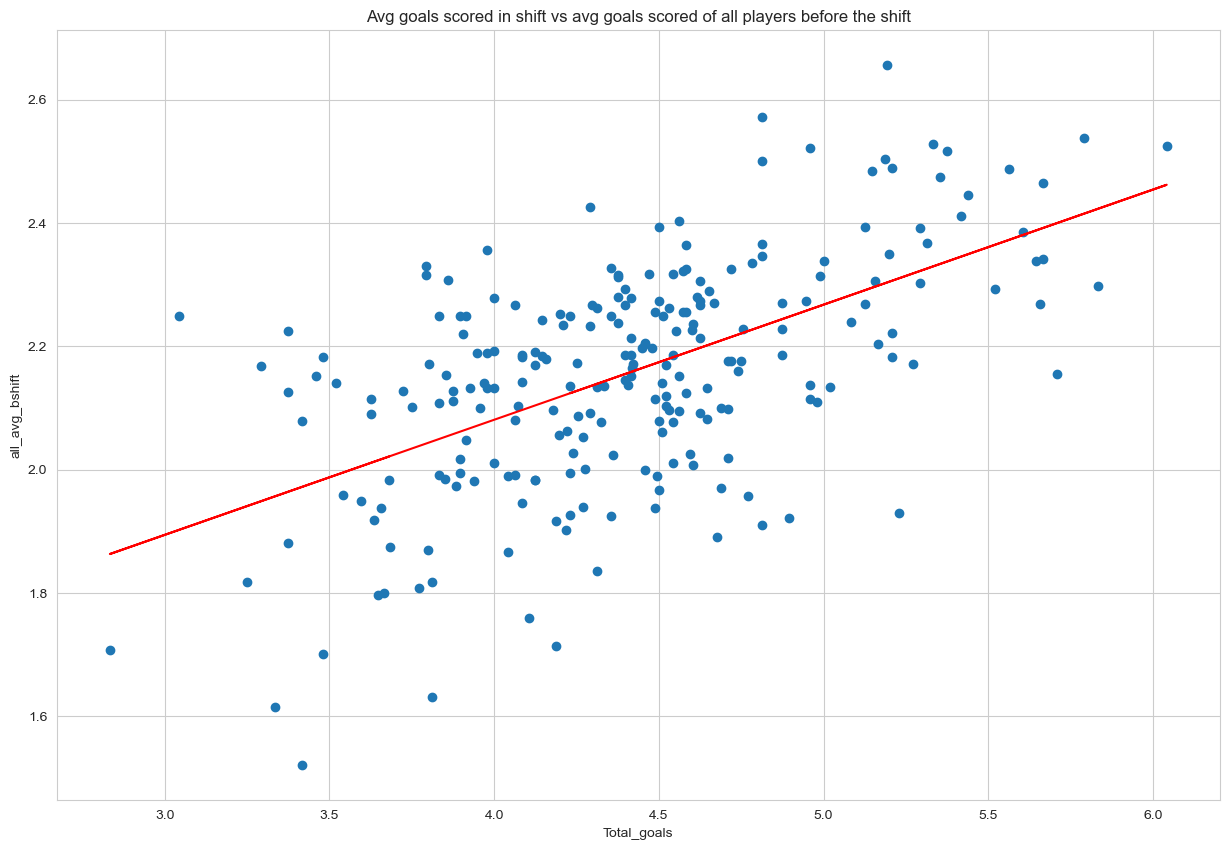

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(x=df_shift_sum['Total_goals'], y=df_shift_sum['all_avg_bshift'].fillna(2.25))
plt.xlabel('Total_goals')
plt.ylabel('all_avg_bshift')
plt.title('Avg goals scored in shift vs avg goals scored of all players before the shift')
plt.grid(True)

# Přidání trendové čáry
z = np.polyfit(df_shift_sum['Total_goals'], df_shift_sum['all_avg_bshift'].fillna(2.25), 1)
p = np.poly1d(z)
plt.plot(df_shift_sum['Total_goals'],p(df_shift_sum['Total_goals']),"r-")
plt.show

In [23]:
# počet zápasů v průběhu směny
df_flipped['match_count_p1_shift'] = df_flipped.groupby(['player_1', 'shift_n']).cumcount() + 1

In [24]:
def bilance_form(df, player,shift_n, match_start, lookback=5.0):
    """
    počítá sílu formy hráče během směny    
    """
    import numpy as np
    match_count_end = int(df.loc[(df['match_start']==match_start) & (df['player_1']==player),'match_count_p1_shift'])
    match_count_start = match_count_end - lookback
    vahy = list(np.linspace(0.1, 0.1 * lookback, int(lookback)))
    forma = list(df.loc[(df['shift_n'] == shift_n) & (df_flipped['player_1'] == player) & (df['match_count_p1_shift'] < match_count_end) & (df['match_count_p1_shift'] >= match_count_start), 'p1_bilance'])
    upravene_slozky = [vahy[i] * forma[i] for i in range(min(len(vahy), len(forma)))]
    velikost_formy = math.sqrt(abs(sum(upravene_slozky)))
    return velikost_formy if sum(upravene_slozky) >= 0 else velikost_formy*-1

In [25]:
def h2h_form(df, player1, player2 ,shift_n, match_start, lookback=3.0):
    """
    počítá sílu formy head2head během směny
    """  
    match_count_end = int(df.loc[(df['match_start']==match_start) & (df['player_1']==player1) & (df['player_2']==player2),'match_count_within_shift_player_pair'])
    match_count_start = match_count_end - lookback
    vahy = list(np.linspace(0.1, 0.1 * lookback, int(lookback)))
    forma = list(df.loc[(df['shift_n'] == shift_n) & (df['player_1']==player1) & (df['player_2']==player2) & (df['match_count_within_shift_player_pair'] < match_count_end) & (df['match_count_within_shift_player_pair'] >= match_count_start), 'p1_bilance'])
    upravene_slozky = [vahy[i] * forma[i] for i in range(min(len(vahy), len(forma)))]    
    velikost_formy = math.sqrt(abs(sum(upravene_slozky)))   
    
    return velikost_formy if sum(upravene_slozky) >= 0 else velikost_formy*-1

In [26]:
def goals_scored_momentum_s(df, player,shift_n, match_start, lookback=5.0):
    """
    počítá momentu vstřelených gólů během směny
    """  
    match_count_end = int(df.loc[(df['match_start']==match_start) & (df['player_1']==player),'match_count_p1_shift'])
    match_count_start = match_count_end - lookback
    vahy = list(np.linspace(0.1, 0.1 * lookback, int(lookback)))
    goly = list(df.loc[(df['shift_n'] == shift_n) & (df_flipped['player_1'] == player) & (df['match_count_p1_shift'] < match_count_end) & (df['match_count_p1_shift'] >= match_count_start), 'player_1_total_goals'])
    upravene_slozky = [vahy[i] * goly[i] for i in range(min(len(vahy), len(goly)))]
    velikost_formy = math.sqrt(sum([hodnota ** 2 for hodnota in upravene_slozky]))
    return velikost_formy 

In [27]:
df_flipped.columns

Index(['match_id', 'date_planned_start', 'match_start', 'player_1', 'player_2',
       'player_1_fh_goals', 'player_2_fh_goals', 'player_1_sh_goals',
       'player_2_sh_goals', 'player_1_total_goals', 'player_2_total_goals',
       'shift_n', 'match_count_within_shift',
       'match_count_within_shift_player_pair', 'Total_goals', 'result',
       'p1_bilance', 'p2_bilance', 'match_count_p1_shift'],
      dtype='object')

In [28]:
# přidání sloupců mometnum forma, momentum góly, h2h
df['p1_momentum_s_total'] = df.apply(lambda x: bilance_form(df_flipped,x['player_1'], x['shift_n'], x['match_start']),axis=1)
df['p2_momentum_s_total'] = df.apply(lambda x: bilance_form(df_flipped,x['player_2'], x['shift_n'], x['match_start']),axis=1)
df['h2h_momentum'] = df.apply(lambda x: h2h_form(df_flipped,x['player_1'],x['player_2'], x['shift_n'], x['match_start']),axis=1)
df['p1_goals_momentum_s'] = df.apply(lambda x: bilance_form(df_flipped,x['player_1'], x['shift_n'], x['match_start']),axis=1)
df['p2_goals_momentum_s'] = df.apply(lambda x: bilance_form(df_flipped,x['player_2'], x['shift_n'], x['match_start']),axis=1)

In [29]:
df_flipped.columns

Index(['match_id', 'date_planned_start', 'match_start', 'player_1', 'player_2',
       'player_1_fh_goals', 'player_2_fh_goals', 'player_1_sh_goals',
       'player_2_sh_goals', 'player_1_total_goals', 'player_2_total_goals',
       'shift_n', 'match_count_within_shift',
       'match_count_within_shift_player_pair', 'Total_goals', 'result',
       'p1_bilance', 'p2_bilance', 'match_count_p1_shift'],
      dtype='object')

In [30]:
# přidání výher, počet zápasů,  win rate, win rate h2h
df_flipped['wins'] = df_flipped.apply(lambda x: df_flipped[(df_flipped['player_1']==x['player_1']) & (df_flipped['match_start']< x['match_start']) & (df_flipped['result']==1)].shape[0],axis=1)
df_flipped['matches_shift'] = df_flipped.groupby(['player_1','shift_n']).cumcount()
df_flipped['matches'] = df_flipped.groupby('player_1').cumcount()
df_flipped['wins_h2h'] = df_flipped.apply(lambda x: df_flipped[(df_flipped['player_1']==x['player_1']) & (df_flipped['player_2']==x['player_2']) & (df_flipped['match_start']< x['match_start']) & (df_flipped['result']==1)].shape[0],axis=1)
df_flipped['matchesh2h'] = df_flipped.groupby(['player_1','player_2']).cumcount()
df_flipped['win_rate'] = df_flipped['wins'] / df_flipped['matches']
df_flipped['win_rate_h2h'] = df_flipped['wins_h2h'] / df_flipped['matchesh2h']
# merge do df
df = df.merge(df_flipped[['match_id', 'player_1','wins','matches','matches_shift','win_rate','wins_h2h','matchesh2h','win_rate_h2h']] , how='left', left_on=['match_id', 'player_1'], right_on=['match_id', 'player_1'],suffixes=("","_p1"))
df = df.merge(df_flipped[['match_id', 'player_1','wins','matches','matches_shift','win_rate','wins_h2h','matchesh2h','win_rate_h2h']] , how='left', left_on=['match_id', 'player_2'], right_on=['match_id', 'player_1'],suffixes=("","_p2"))


In [31]:
# úprava df
df['bilance_p1_shift'] = (df['bilance_p1_shift']/df['matches_shift']).fillna(0)
df['bilance_p2_shift'] = (df['bilance_p2_shift']/df['matches_shift_p2']).fillna(0)
df['bilance_h2h_shift'] = (df['bilance_h2h_shift']/df['match_count_within_shift_player_pair']).fillna(0)

In [32]:
df.columns

Index(['match_id', 'date_planned_start', 'match_start', 'player_1', 'player_2',
       'player_1_fh_goals', 'player_2_fh_goals', 'player_1_sh_goals',
       'player_2_sh_goals', 'player_1_total_goals', 'player_2_total_goals',
       'shift_n', 'match_count_within_shift',
       'match_count_within_shift_player_pair', 'Total_goals', 'result',
       'p1_bilance', 'p2_bilance', 'bilance_p1_shift', 'bilance_p2_shift',
       'bilance_h2h_shift', 'total_goals_shift_avg', 'p1_avg_scored_Bshift',
       'p2_avg_scored_Bshift', 'p1_avg_scored_shift', 'p2_avg_scored_shift',
       'p1_avg_concat_Bshift', 'p2_avg_concat_Bshift', 'p1_avg_concat_shift',
       'p2_avg_concat_shift', 'p1_avg_scored_Bshift_h2h',
       'p2_avg_scored_Bshift_h2h', 'p1_avg_scored_shift_h2h',
       'p2_avg_scored_shift_h2h', 'p1_momentum_s_total', 'p2_momentum_s_total',
       'h2h_momentum', 'p1_goals_momentum_s', 'p2_goals_momentum_s', 'wins',
       'matches', 'matches_shift', 'win_rate', 'wins_h2h', 'matchesh2h',

In [33]:
df.to_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15220 entries, 0 to 15219
Data columns (total 54 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   match_id                              15220 non-null  int64  
 1   date_planned_start                    15220 non-null  int64  
 2   match_start                           15220 non-null  int64  
 3   player_1                              15220 non-null  int64  
 4   player_2                              15220 non-null  int64  
 5   player_1_fh_goals                     15220 non-null  int64  
 6   player_2_fh_goals                     15220 non-null  int64  
 7   player_1_sh_goals                     15220 non-null  int64  
 8   player_2_sh_goals                     15220 non-null  int64  
 9   player_1_total_goals                  15220 non-null  int64  
 10  player_2_total_goals                  15220 non-null  int64  
 11  shift_n        